In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [7]:
# import data 
df = pd.read_csv('/Users/arthurrastelli/Desktop/DS/Assignment/Assignment.csv')
df.head()

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   duree     163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nbrtotc   163657 non-null  int64  
 5   nbrtotan  163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 20.0+ MB


In [11]:
summary = df.describe()
summary

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot
count,163657.000000,163657.000000,163657.000000,163657.000000,163657.000000,163657.000000,1.636570e+05
mean,47.000629,5270.912408,0.889786,-0.212509,0.123979,0.157575,2.011004e+02
std,14.831784,2687.630694,0.244141,0.591848,0.367597,0.976721,5.885387e+03
min,17.000000,1000.000000,0.002740,-5.899897,0.000000,0.000000,0.000000e+00
25%,35.000000,2900.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,46.000000,5030.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,58.000000,7500.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
max,95.000000,9990.000000,1.008219,0.008186,5.000000,182.500000,1.989568e+06


<Axes: xlabel='powerc', ylabel='chargtot'>

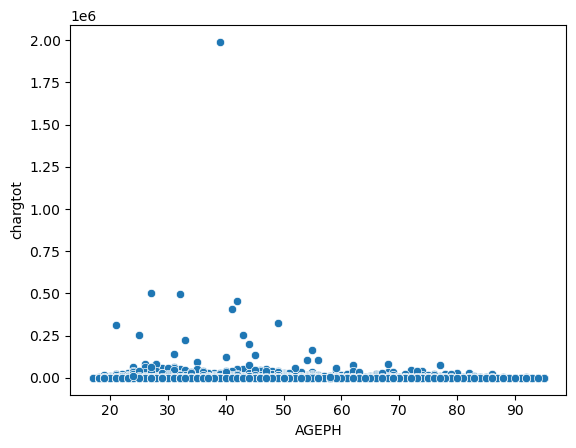

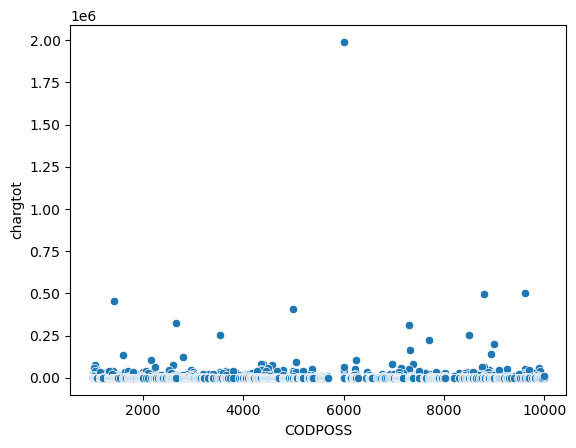

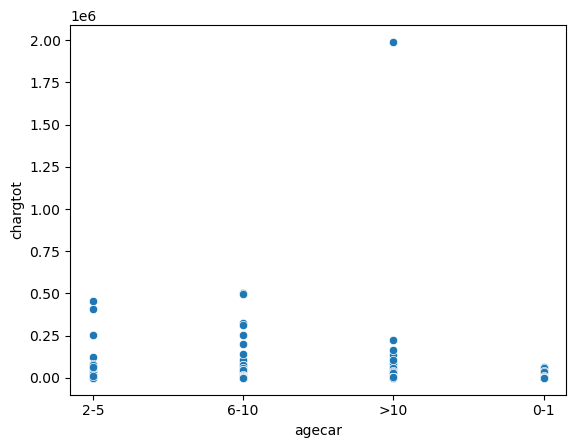

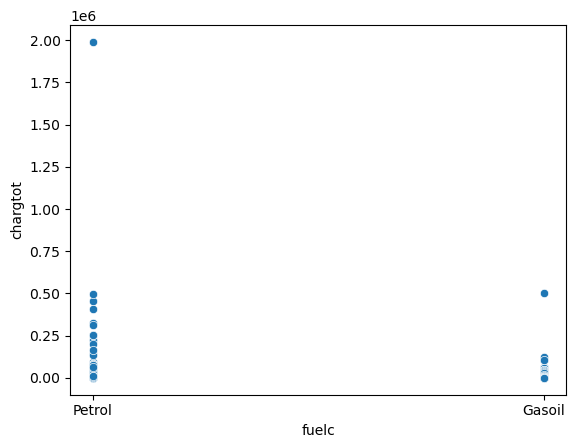

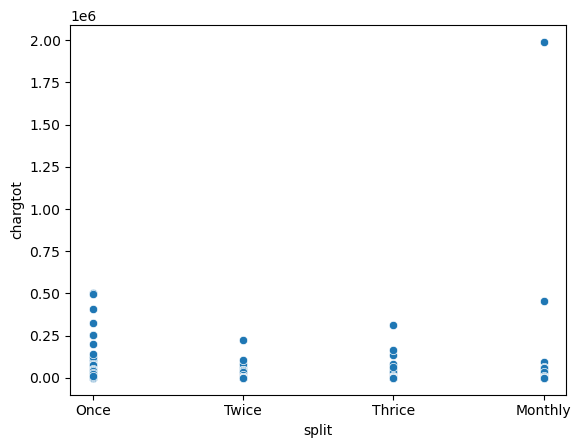

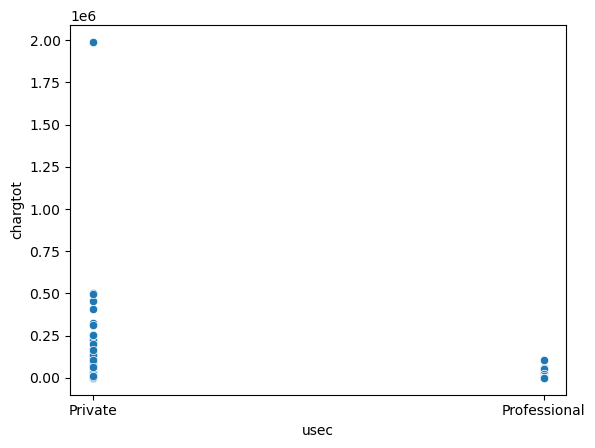

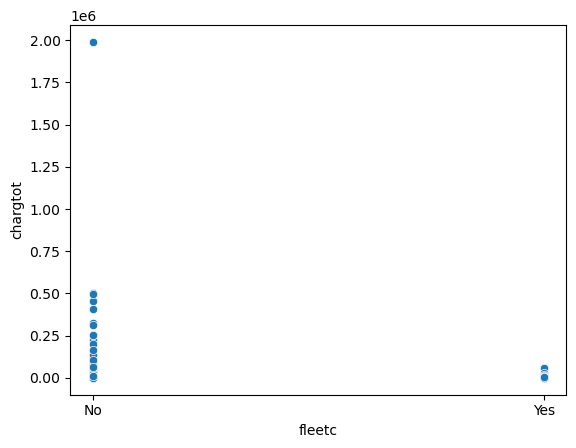

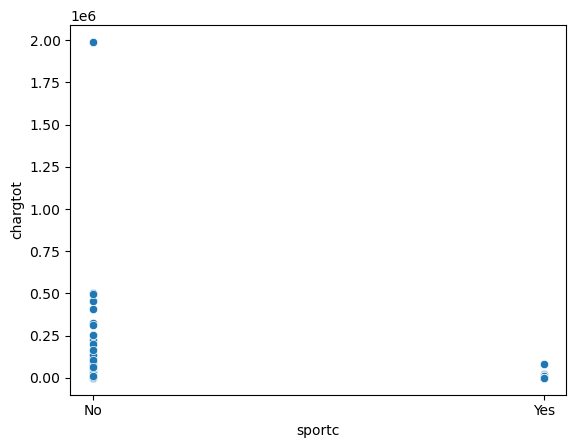

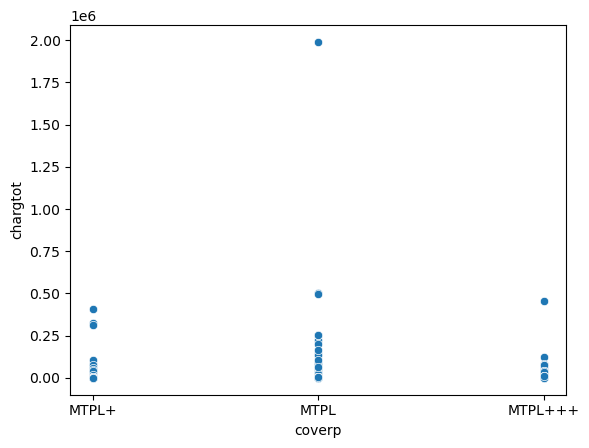

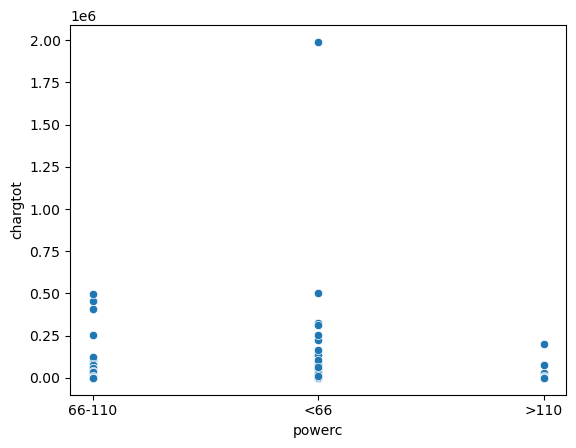

In [3]:
# Scatterplots for the claims
plt.figure()
sns.scatterplot(data = df, x="AGEPH",y="chargtot")
plt.figure()
sns.scatterplot(data = df, x="CODPOSS", y="chargtot")
plt.figure()
sns.scatterplot(data = df, x="agecar", y="chargtot")
plt.figure()
sns.scatterplot(data = df, x="fuelc",y="chargtot")
plt.figure()
sns.scatterplot(data = df, x="split", y="chargtot")
plt.figure()
sns.scatterplot(data = df, x="usec", y="chargtot")
plt.figure()
sns.scatterplot(data = df, x="fleetc", y="chargtot")
plt.figure()
sns.scatterplot(data = df, x="sportc", y="chargtot")
plt.figure()
sns.scatterplot(data = df, x="coverp", y="chargtot")
plt.figure()
sns.scatterplot(data = df, x="powerc", y="chargtot")

<Axes: xlabel='powerc', ylabel='Count'>

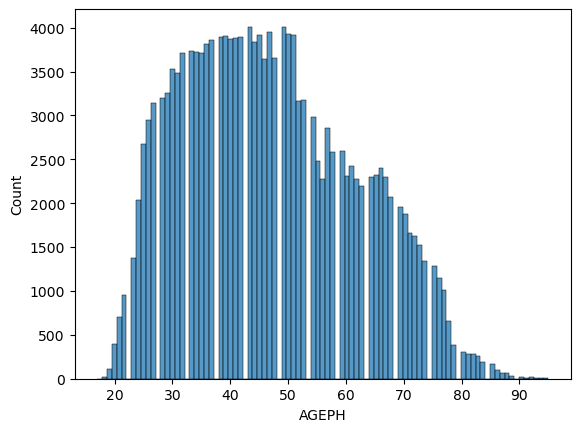

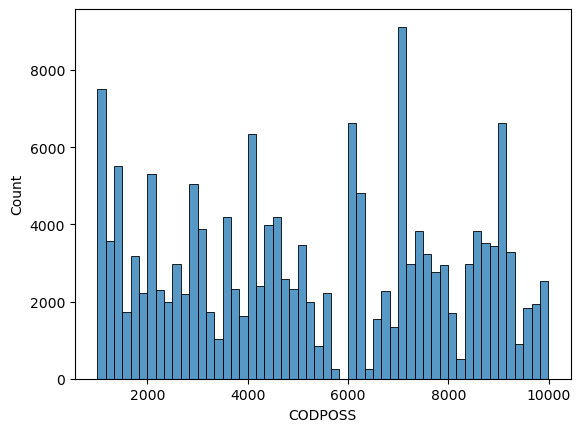

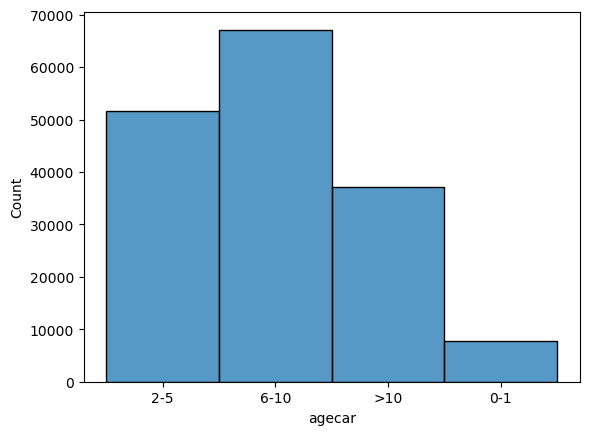

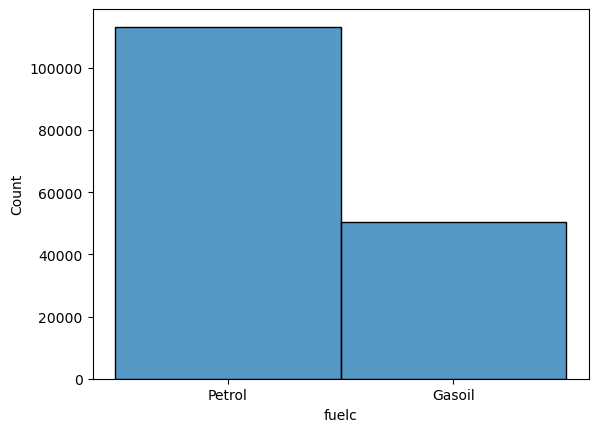

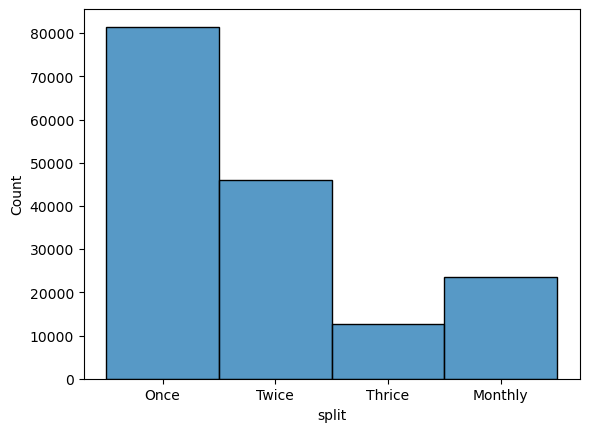

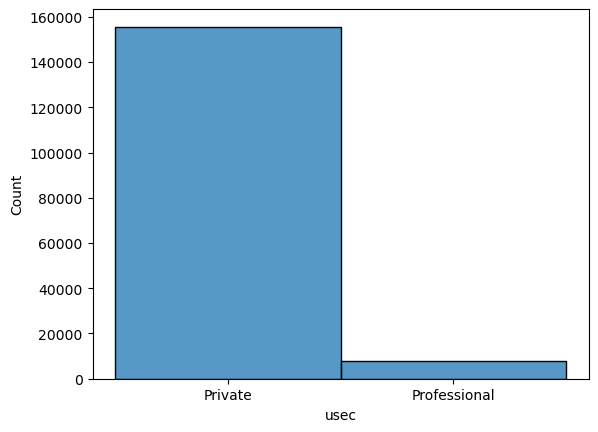

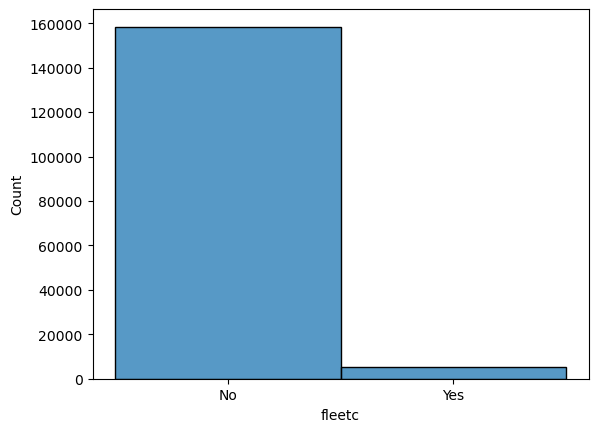

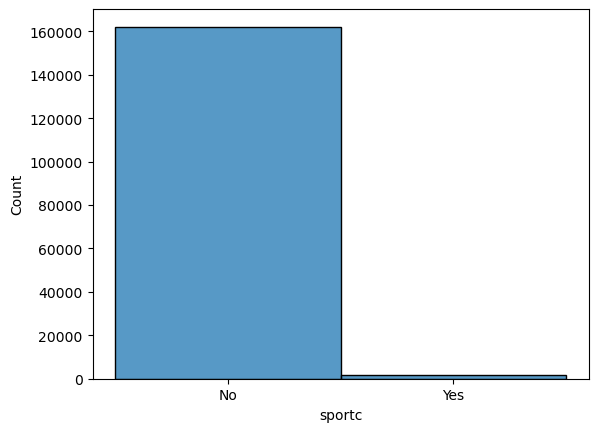

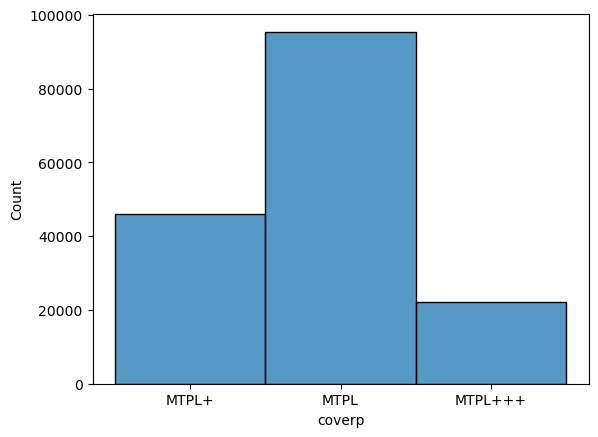

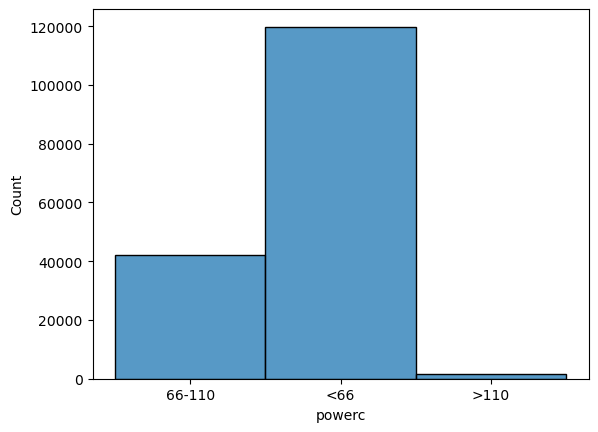

In [4]:
# set up dummy variabels?
plt.figure()
sns.histplot(data = df, x="AGEPH") 
plt.figure()
sns.histplot(data = df, x="CODPOSS")
plt.figure()
sns.histplot(data = df, x="agecar")
plt.figure()
sns.histplot(data = df, x="fuelc")
plt.figure()
sns.histplot(data = df, x="split")
plt.figure()
sns.histplot(data = df, x="usec")
plt.figure()
sns.histplot(data = df, x="fleetc")
plt.figure()
sns.histplot(data = df, x="sportc")
plt.figure()
sns.histplot(data = df, x="coverp")
plt.figure()
sns.histplot(data = df, x="powerc")

In [6]:
# Check which variables are 'correlated' or need to have a interaction effect
correlation = df.corr()
correlation

/var/folders/mq/487s_vq1171byqhf182vs0n40000gn/T/ipykernel_60716/788229233.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot
AGEPH,1.000000,-0.029827,0.099901,0.078857,-0.069035,-0.038769,-0.010823
CODPOSS,-0.029827,1.000000,0.070874,0.061599,-0.017948,-0.010157,0.001296
duree,0.099901,0.070874,1.000000,0.913371,0.052203,-0.068061,0.000843
lnexpo,0.078857,0.061599,0.913371,1.000000,0.056768,-0.081085,0.002014
nbrtotc,-0.069035,-0.017948,0.052203,0.056768,1.000000,0.471175,0.100368
nbrtotan,-0.038769,-0.010157,-0.068061,-0.081085,0.471175,1.000000,0.058756
chargtot,-0.010823,0.001296,0.000843,0.002014,0.100368,0.058756,1.000000
